# **11차시: 인코딩 처리**
## 🔍 **학습목표**
- 범주형(object) 변수를 수치형으로 변환하는 목적을 이해할 수 있다.
- LabelEncoder와 get_dummies()를 사용하여 적절한 인코딩을 수행할 수 있다.

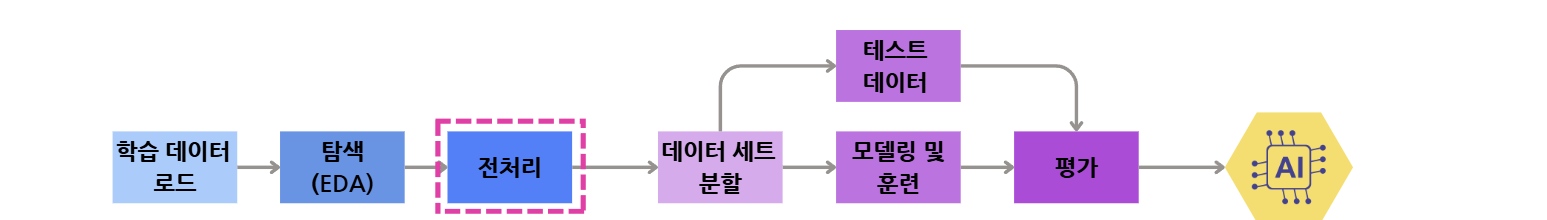

---

In [1]:
# 미니 데이터 생성
import pandas as pd

df = pd.DataFrame({
    '고객등급': ['vip', 'basic', 'premium', 'vip', 'basic'],
    '거주지역': ['서울', '부산', '서울', '대구', '대구'],
    '구매금액': [30000, 12000, 25000, 40000, 15000]
})

df

,고객등급,거주지역,구매금액
0,vip,서울,30000
1,basic,부산,12000
2,premium,서울,25000
3,vip,대구,40000
4,basic,대구,15000



## 📌 **핵심 이론 정리**
- **인코딩(encoding)**: 문자를 숫자로 변환하는 기술
- 컴퓨터가 계산할 수 있는 값으로 변환하기 위해서 사용
- 변환하지만 각 **컬럼(변수)의 특성은 유지**되는 방향으로 변환 선호



## **1. Label Encoding**
- LabelEncoder는 범주형 데이터를 **정수로 매핑**하는 방법
- 범주 간 **순서 의미**가 있을 때 적합
- sklearn의 LabelEncoder 사용


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# (1) 고유값 학습
le.fit(df['고객등급'])
print("클래스 목록:", le.classes_)  # ['basic', 'premium', 'vip']

# (2) 숫자로 변환
df['고객등급_LE'] = le.transform(df['고객등급'])
df

클래스 목록: ['basic' 'premium' 'vip']


,고객등급,거주지역,구매금액,고객등급_LE
0,vip,서울,30000,2
1,basic,부산,12000,0
2,premium,서울,25000,1
3,vip,대구,40000,2
4,basic,대구,15000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# fit_transform으로 한 번에 변환
df['고객등급_LE2'] = le.fit_transform(df['고객등급'])
df

,고객등급,거주지역,구매금액,고객등급_LE,고객등급_LE2
0,vip,서울,30000,2,2
1,basic,부산,12000,0,0
2,premium,서울,25000,1,1
3,vip,대구,40000,2,2
4,basic,대구,15000,0,0


## **2. get_dummies – 명목형 변수 인코딩 (One-hot)**
- get_dummies()는 범주형 변수에 대해 각 범주를 컬럼으로 분리하고,
해당되면 1, 아니면 0으로 표시하는 방식
- **순서가 없는** 명목형 변수에 적합
- drop_first=True 설정 시 다중공선성 문제 방지





> ❓**다중공선성이란?**
>
> 입력 변수들끼리 서로 비슷한 정보를 가져서 모델이 혼란스러워지는 현상

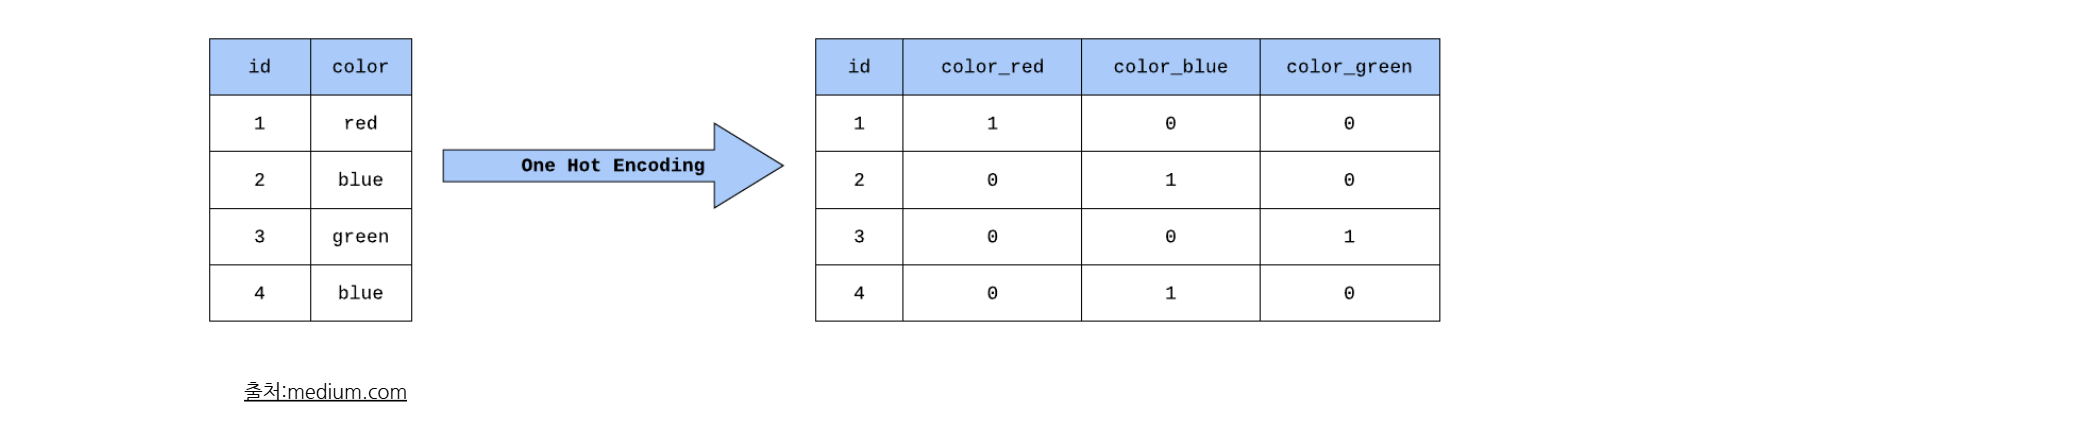

In [5]:
pd.get_dummies(df, columns=['거주지역'])
pd.get_dummies(df, columns=['거주지역'], drop_first=True) #다중공선성 문제 방지
# pd.get_dummies(df, columns=['거주지역'], drop_first=True,dtype='int') #정수로 표시

,고객등급,구매금액,고객등급_LE,거주지역_부산,거주지역_서울
0,vip,30000,2,False,True
1,basic,12000,0,True,False
2,premium,25000,1,False,True
3,vip,40000,2,False,False
4,basic,15000,0,False,False


---

## **연습 문제**


### **문제 1. 'restaurant_type' 컬럼에 대해 LabelEncoder를 적용하고, 결과는 'restaurant_type_le' 컬럼에 저장하시오.**

In [6]:
# 이 코드를 먼저 실행후 전처리하시오.
df = pd.read_csv('데이터세트/jajang_price.csv')
df.head()

,year,cpi,flour_index,pork_index,onion_index,minimum_wage,location,special_menu,restaurant_type,delivery_only,coupon_discount,price
0,2000,36.444365,39.562248,33.170651,30.421736,1865,Gyeonggi,Ganjjajang,Normal,0,8.6,2800
1,1973,11.043598,12.683397,10.626395,NaN,231,Gyeonggi,Ganjjajang,Normal,0,2.9,1700
2,1980,15.622815,14.034484,17.451849,21.881817,326,Seoul,Basic,Normal,0,7.4,1300
3,2011,61.829747,56.947619,74.465223,66.331692,4320,Daegu,Ganjjajang,Franchise,1,7.7,4850
4,1981,16.772157,15.112856,15.336770,22.060043,350,Incheon,Ganjjajang,Franchise,0,2.2,2350


In [10]:
# 여기에 코드를 작성하세요.
from sklearn.preprocessing import LabelEncoder 

le=LabelEncoder()

df['restaurant_type_le']=le.fit_transform(df['restaurant_type'])
df

,year,cpi,flour_index,pork_index,onion_index,minimum_wage,location,special_menu,restaurant_type,delivery_only,coupon_discount,price,restaurant_type_le
0,2000,36.444365,39.562248,33.170651,30.421736,1865,Gyeonggi,Ganjjajang,Normal,0,8.6,2800,1
1,1973,11.043598,12.683397,10.626395,NaN,231,Gyeonggi,Ganjjajang,Normal,0,2.9,1700,1
2,1980,15.622815,14.034484,17.451849,21.881817,326,Seoul,Basic,Normal,0,7.4,1300,1
3,2011,61.829747,56.947619,74.465223,66.331692,4320,Daegu,Ganjjajang,Franchise,1,7.7,4850,0
4,1981,16.772157,15.112856,15.336770,22.060043,350,Incheon,Ganjjajang,Franchise,0,2.2,2350,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1971,10.233665,8.298595,12.801185,7.931911,214,Daegu,Basic,Normal,0,11.6,50,1
7996,1999,37.129960,42.164919,35.913029,NaN,1600,Gyeonggi,Ganjjajang,Normal,0,2.3,2700,1
7997,1975,12.784739,14.573693,15.551516,13.837991,267,Gyeonggi,Basic,Normal,0,1.4,700,1
7998,2011,61.798144,72.256830,70.753649,69.458926,4320,Gwangju,Samseon,Normal,0,14.3,4650,1


### **문제 2. object 타입 컬럼 전체에 대해 get_dummies()를 적용하시오.**
- object 타입 컬럼 검색을 위해 `df.select_dtypes('object').columns.tolist()` 사용
- 다중공선성을 방지하기 위해 `drop_first=True` 옵션을 적용
- `dtype`은 정수로 변환되도록 옵션 적용
- 결과는 `df_encoded`라는 변수에 저장

In [13]:
# 여기에 코드를 작성하세요
import pandas as pd

df_encoded=pd.get_dummies(df, columns=df.select_dtypes('object').columns.tolist(), drop_first=True, dtype=int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     8000 non-null   int64  
 1   cpi                      8000 non-null   float64
 2   flour_index              8000 non-null   float64
 3   pork_index               7840 non-null   float64
 4   onion_index              7040 non-null   float64
 5   minimum_wage             8000 non-null   int64  
 6   delivery_only            8000 non-null   int64  
 7   coupon_discount          8000 non-null   float64
 8   price                    8000 non-null   int64  
 9   restaurant_type_le       8000 non-null   int64  
 10  location_Daegu           8000 non-null   int64  
 11  location_Gwangju         8000 non-null   int64  
 12  location_Gyeonggi        8000 non-null   int64  
 13  location_Incheon         8000 non-null   int64  
 14  location_Seoul          

## **도전 문제**

### **문제 1. 다음을 수행하고 질문에 답하시오.**

(1) df에서 `restaurant_type` 컬럼에 어떤 값들이 있는지 확인하시오.

(2) 위에서 `get_dummies` 실행 결과, df_encoded에서 `restaurant_type_Normal`과 `restaurant_type_Premium` 컬럼이 생성되었습니다. 이 두 컬럼의 값이 모두 0인 행은 어떤 식당 유형을 의미하는지 답을 고르시오. (예: `답안01 = 1`)

1. Normal
2. Premium
3. Franchise
4. 알 수 없다

In [14]:
# 여기에 코드를 작성하세요
df['restaurant_type'].value_counts()

restaurant_type
Normal       5055
Franchise    2164
Premium       781
Name: count, dtype: int64